In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

#Imported File
df =  pd.read_csv('/content/BCH-USD.csv')
df.head() #first five data

df.shape #shape of dataset in rows and columns

df.describe() #mathematic calculations like mean,count,etc

df.info() #provide datatyple and memory usage

#plotting graph of close price of bitcoin cash
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('BCH-USD Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

#From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data.
#So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.
df[df['Close'] == df['Adj Close']].shape, df.shape

#checks the null values
df.isnull().sum()

#ploting all graphs for all features
features = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sb.distplot(df[col])
plt.show()

#box plots
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sb.boxplot(df[col])
plt.show()

#feature engineering this feature sometimes increases the perfomance of the model
splitted = df['Date'].str.split('-', expand=True)
df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')
df.head()

#bar graph
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
 plt.subplot(2,2,i+1)
 data_grouped[col].plot.bar()
plt.show()

#Quater end
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

#we have added some more columns which will help in the training of our model
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

#pie chart
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

#heatmap
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

#After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model.
#After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

#models
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier(), RandomForestClassifier()]

for i in range(4):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()

#confusion matrix for validation data
#metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
#plt.show()















FileNotFoundError: [Errno 2] No such file or directory: '/content/BCH-USD.csv'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       322 non-null    object 
 1   Open       322 non-null    float64
 2   High       322 non-null    float64
 3   Low        322 non-null    float64
 4   Close      322 non-null    float64
 5   Adj Close  322 non-null    float64
 6   Volume     322 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 17.7+ KB


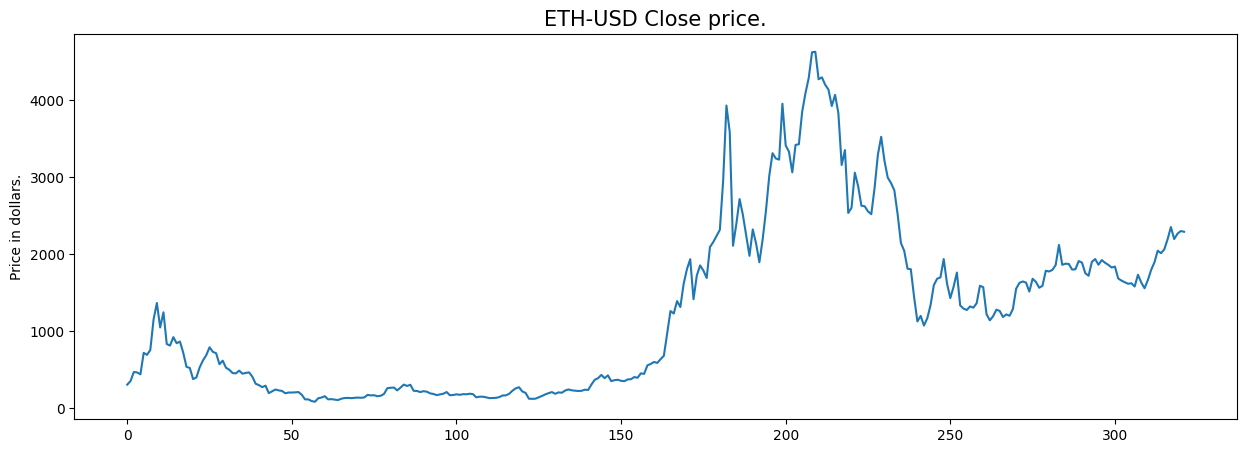

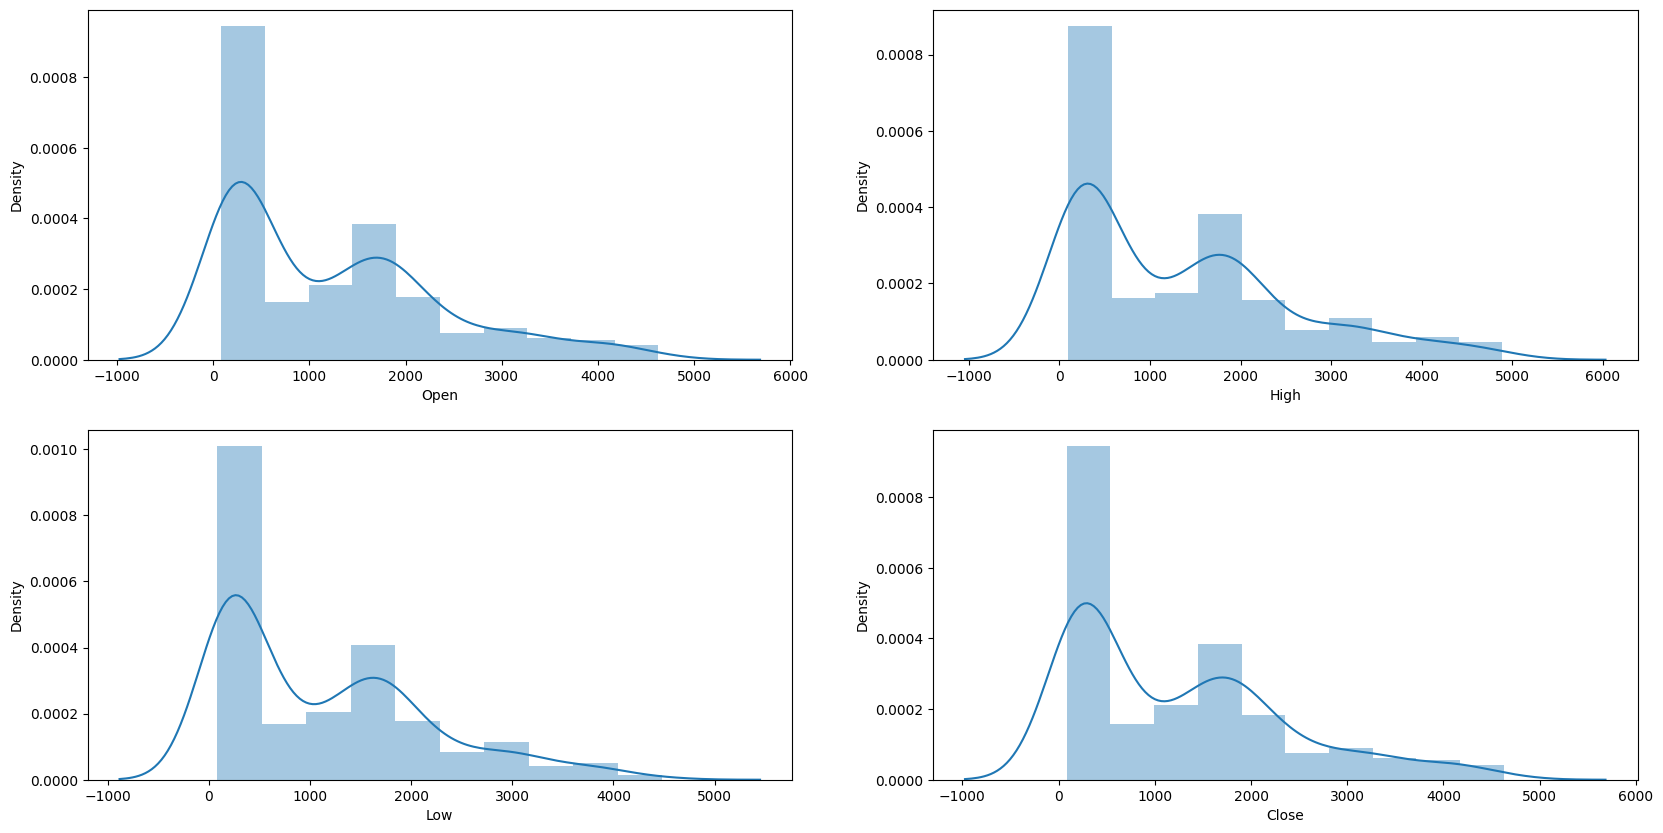

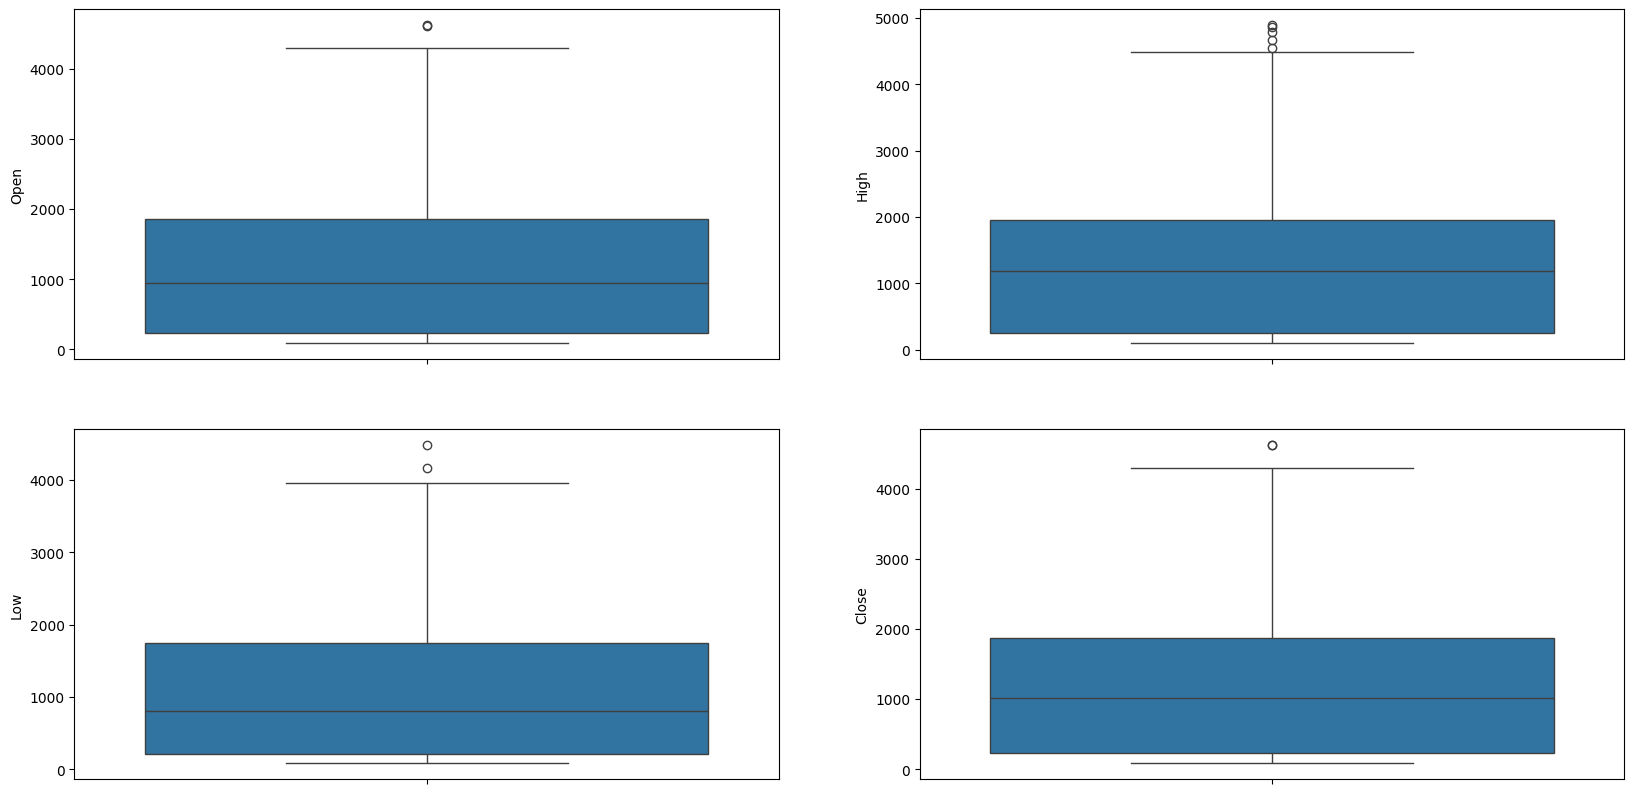

NameError: name 'data_grouped' is not defined

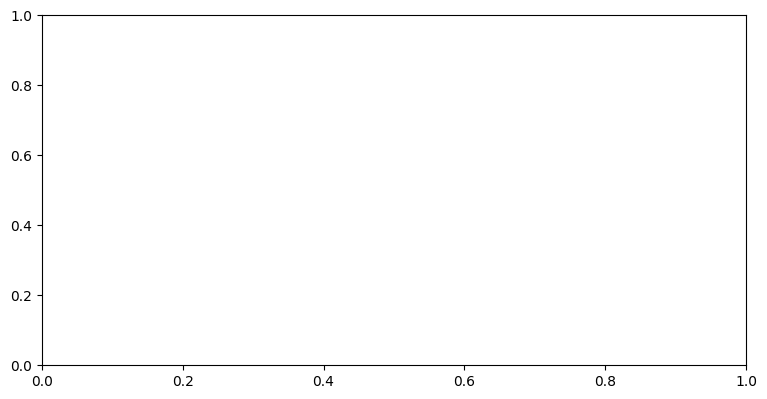

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

#Imported File
df =  pd.read_csv('/content/ETH-USD.csv')
df.head() #first five data

df.shape #shape of dataset in rows and columns

df.describe() #mathematic calculations like mean,count,etc

df.info() #provide datatyple and memory usage

#plotting graph of close price of bitcoin cash
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('ETH-USD Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

#From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data.
#So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.
df[df['Close'] == df['Adj Close']].shape, df.shape

#checks the null values
df.isnull().sum()

#ploting all graphs for all features
features = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sb.distplot(df[col])
plt.show()

#box plots
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sb.boxplot(df[col])
plt.show()

#feature engineering this feature sometimes increases the perfomance of the model
splitted = df['Date'].str.split('-', expand=True)
df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')
df.head()

#bar graph
df['year'].dtype
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
 plt.subplot(2,2,i+1)
 data_grouped[col].plot.bar()
plt.show()

#Quater end
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

#we have added some more columns which will help in the training of our model
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

#pie chart
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

#heatmap
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

#After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model.
#After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

#models
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier(), RandomForestClassifier()]

for i in range(4):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()

#confusion matrix for validation data
#metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
#plt.show()















<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       471 non-null    object 
 1   Open       471 non-null    float64
 2   High       471 non-null    float64
 3   Low        471 non-null    float64
 4   Close      471 non-null    float64
 5   Adj Close  471 non-null    float64
 6   Volume     471 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 25.9+ KB


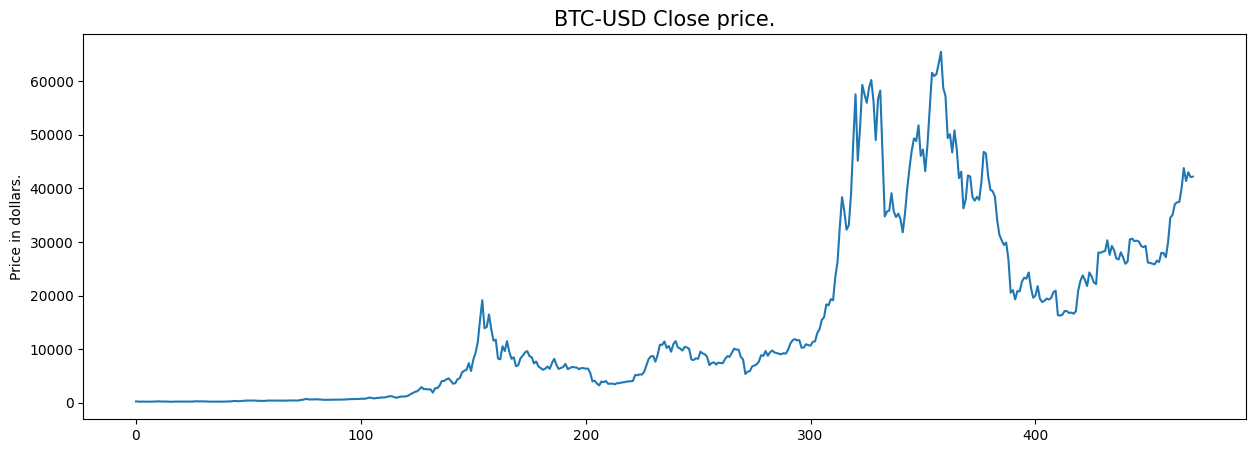

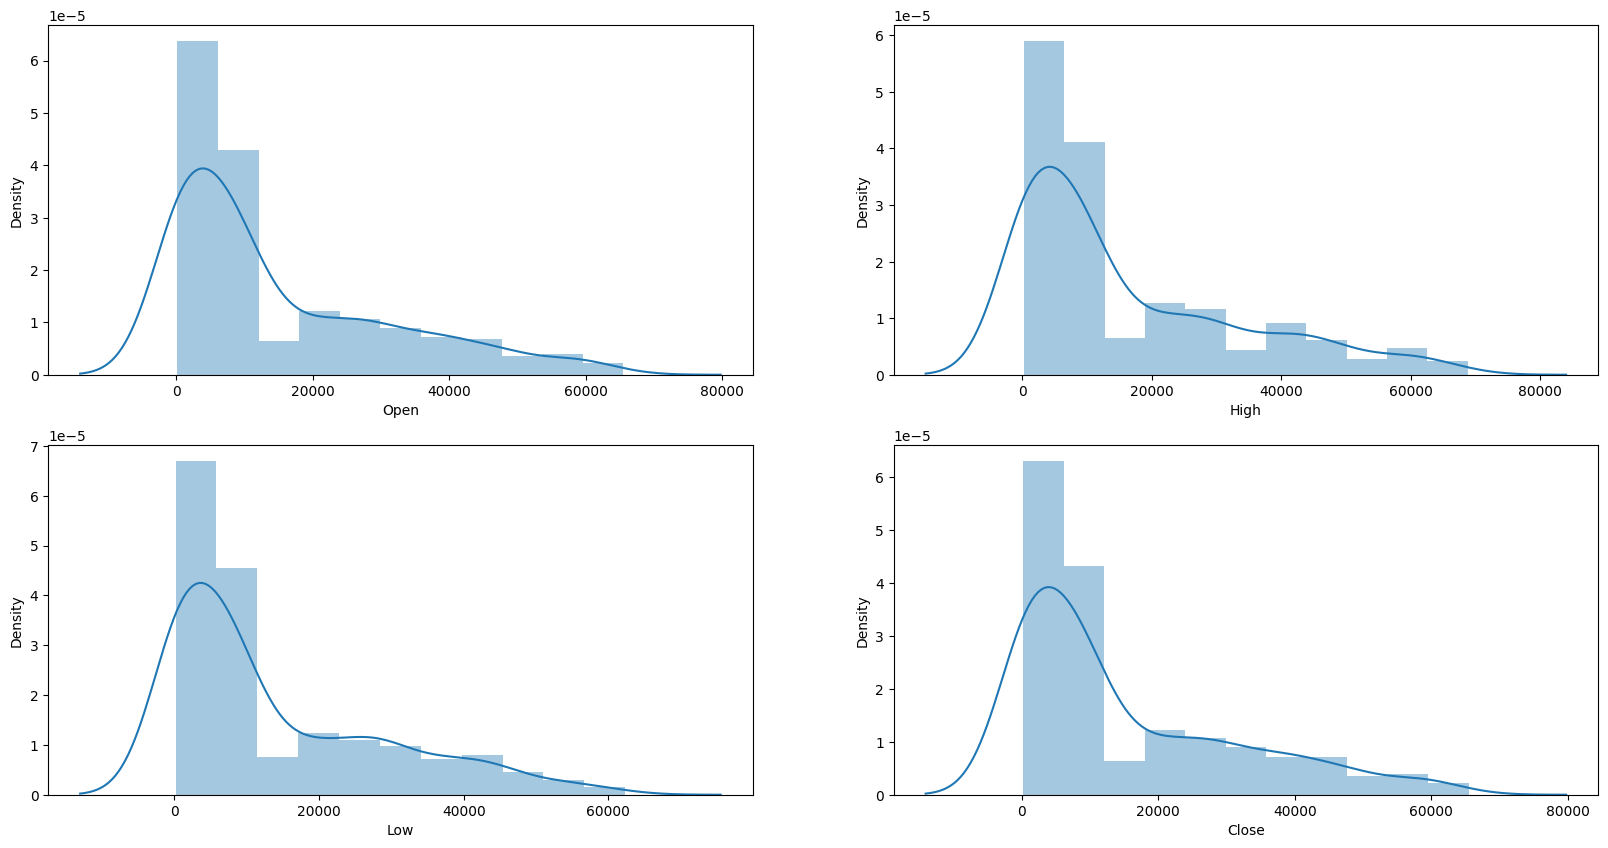

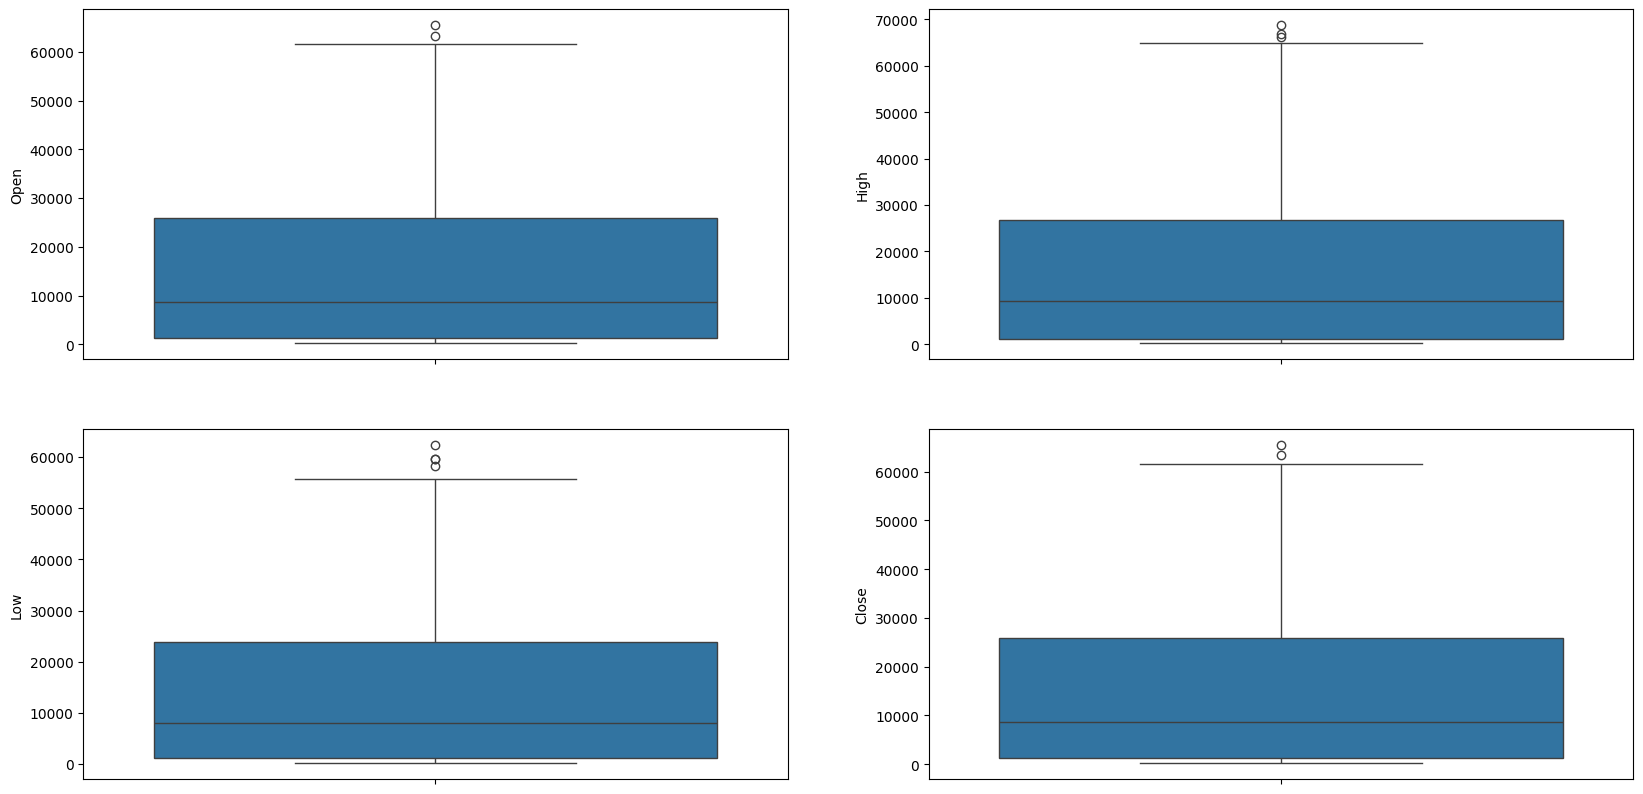

TypeError: Could not convert 2014-12-29 to numeric

In [ ]:

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

#Imported File
df =  pd.read_csv('/content/BTC-USD.csv')
df.head() #first five data

df.shape #shape of dataset in rows and columns

df.describe() #mathematic calculations like mean,count,etc

df.info() #provide datatyple and memory usage

#plotting graph of close price of bitcoin cash
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('BTC-USD Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

#From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data.
#So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.
df[df['Close'] == df['Adj Close']].shape, df.shape

#checks the null values
df.isnull().sum()

#ploting all graphs for all features
features = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sb.distplot(df[col])
plt.show()

#box plots
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sb.boxplot(df[col])
plt.show()

#feature engineering this feature sometimes increases the perfomance of the model
splitted = df['Date'].str.split('-', expand=True)
df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')
df.head()

#bar graph
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
 plt.subplot(2,2,i+1)
 data_grouped[col].plot.bar()
plt.show()

#Quater end
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

#we have added some more columns which will help in the training of our model
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

#pie chart
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

#heatmap
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

#After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model.
#After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

#models
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier(), RandomForestClassifier()]

for i in range(4):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()


#confusion matrix for validation data
#metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
#plt.show()















In [ ]:
# import libraries
# Adaboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

#Imported File
df =  pd.read_csv('/content/BCH-USD.csv')
df.head() #first five data

df.shape #shape of dataset in rows and columns

df.describe() #mathematic calculations like mean,count,etc

df.info() #provide datatyple and memory usage

#plotting graph of close price of bitcoin cash
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('BCH-USD Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

#From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data.
#So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.
df[df['Close'] == df['Adj Close']].shape, df.shape

#checks the null values
df.isnull().sum()

#ploting all graphs for all features
features = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sb.distplot(df[col])
plt.show()

#box plots
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sb.boxplot(df[col])
plt.show()

#feature engineering this feature sometimes increases the perfomance of the model
splitted = df['Date'].str.split('-', expand=True)
df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')
df.head()

#bar graph
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
 plt.subplot(2,2,i+1)
 data_grouped[col].plot.bar()
plt.show()

#Quater end
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

#we have added some more columns which will help in the training of our model
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

#pie chart
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

#heatmap
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

#After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model.
#After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

#models
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for model in models:
    adaboost_model = AdaBoostClassifier(base_estimator=model, n_estimators=50, random_state=42)
    adaboost_model.fit(X_train, Y_train)

    print(f'{model} : ')
    print('Training Accuracy : ', roc_auc_score(Y_train, adaboost_model.predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', roc_auc_score(Y_valid, adaboost_model.predict_proba(X_valid)[:,1]))
    print()

#confusion matrix for validation data
#metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
#plt.show()















<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       322 non-null    object 
 1   Open       322 non-null    float64
 2   High       322 non-null    float64
 3   Low        322 non-null    float64
 4   Close      322 non-null    float64
 5   Adj Close  322 non-null    float64
 6   Volume     322 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 17.7+ KB


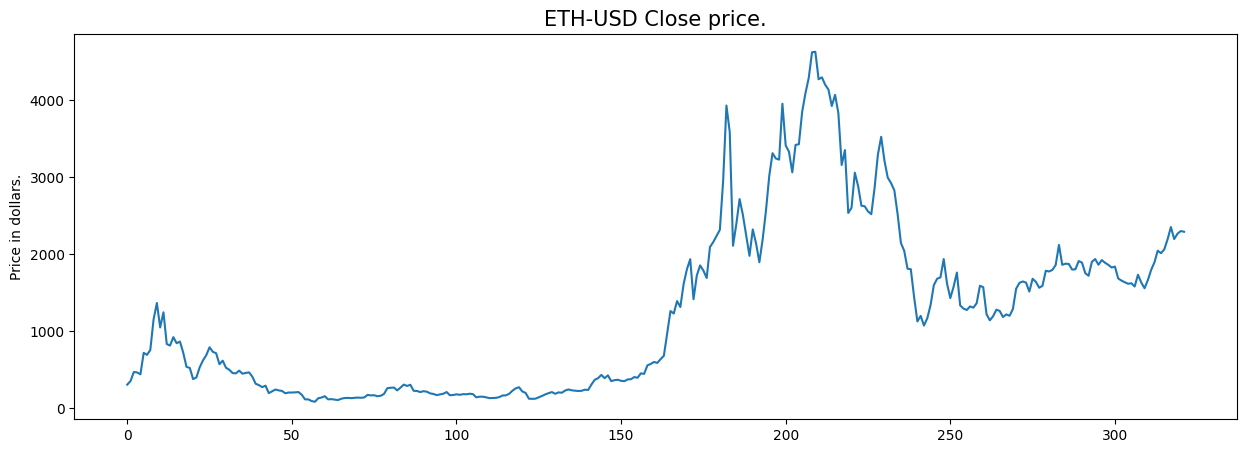

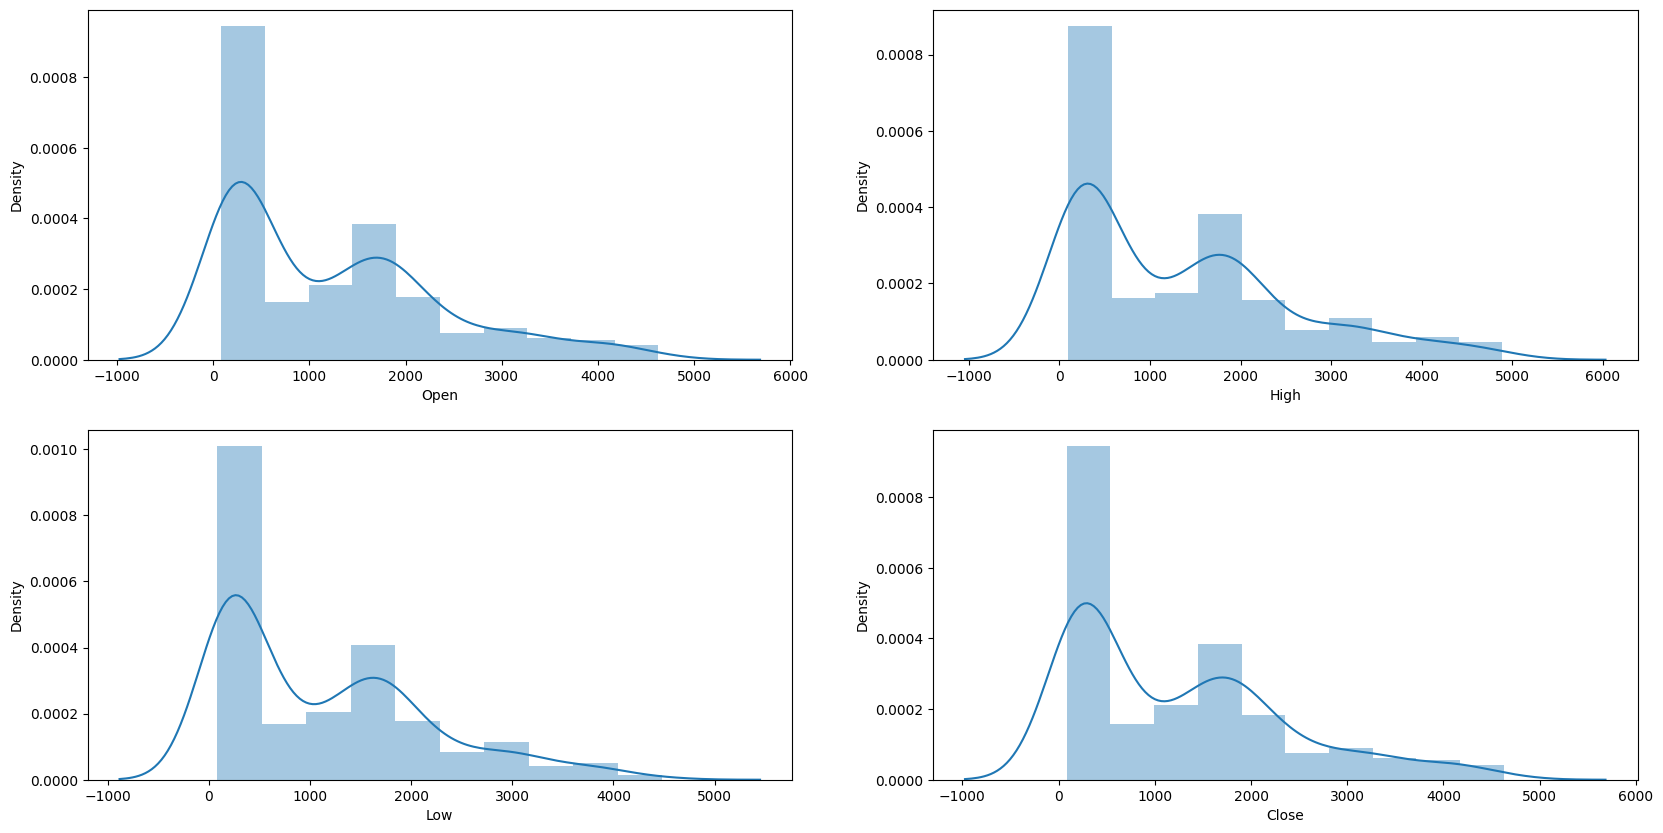

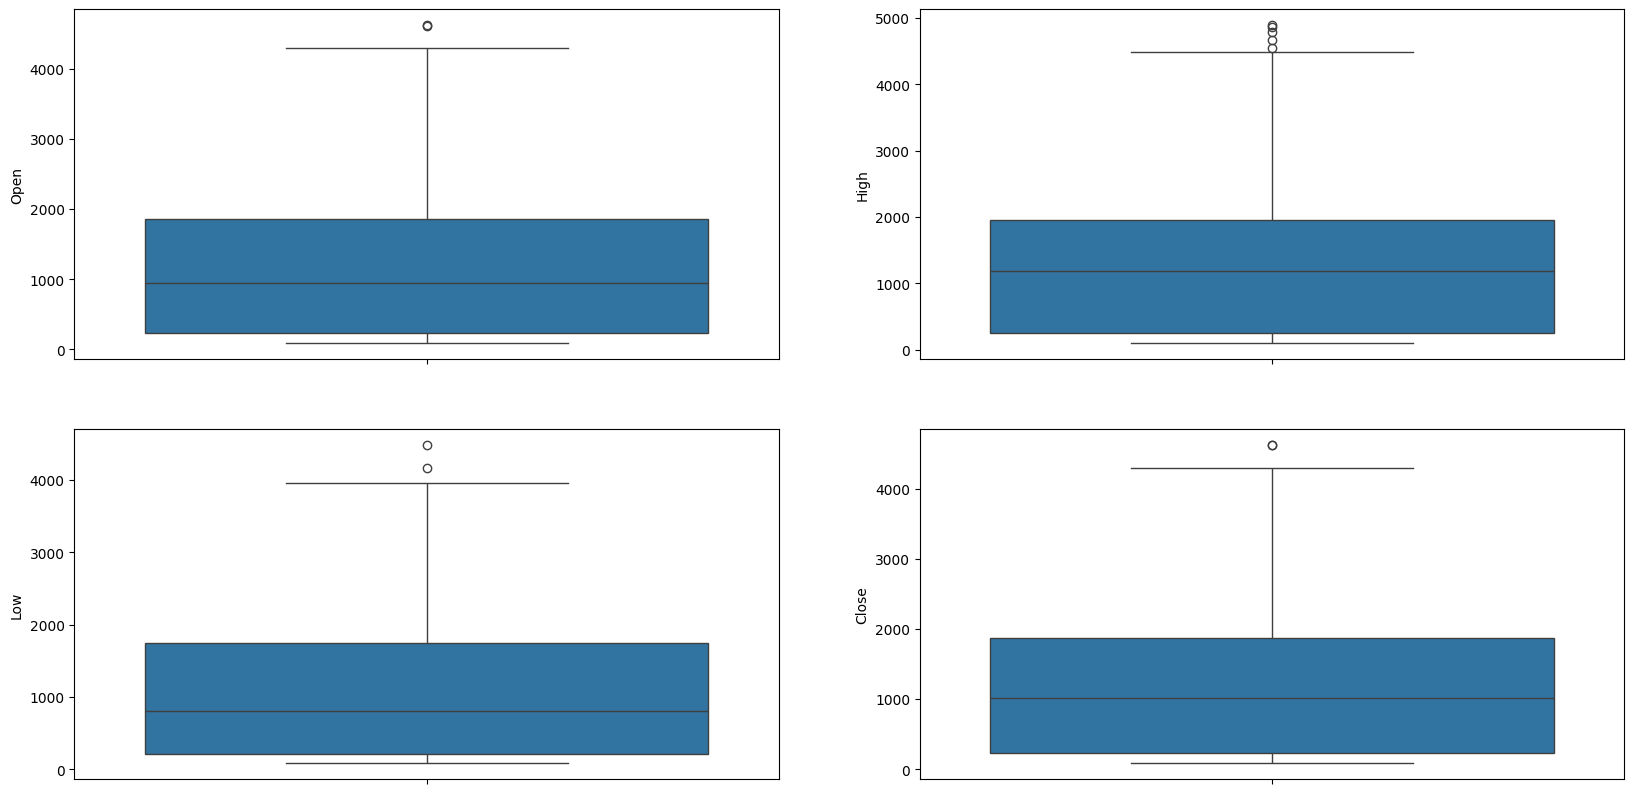

TypeError: Could not convert 2017-11-062017-11-132017-11-202017-11-272017-12-042017-12-112017-12-182017-12-25 to numeric

In [ ]:
# Adaboost
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

#Imported File
df =  pd.read_csv('/content/ETH-USD.csv')
df.head() #first five data

df.shape #shape of dataset in rows and columns

df.describe() #mathematic calculations like mean,count,etc

df.info() #provide datatyple and memory usage

#plotting graph of close price of bitcoin cash
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('ETH-USD Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

#From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data.
#So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.
df[df['Close'] == df['Adj Close']].shape, df.shape

#checks the null values
df.isnull().sum()

#ploting all graphs for all features
features = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sb.distplot(df[col])
plt.show()

#box plots
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sb.boxplot(df[col])
plt.show()

#feature engineering this feature sometimes increases the perfomance of the model
splitted = df['Date'].str.split('-', expand=True)
df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')
df.head()

#bar graph
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
 plt.subplot(2,2,i+1)
 data_grouped[col].plot.bar()
plt.show()

#Quater end
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

#we have added some more columns which will help in the training of our model
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

#pie chart
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

#heatmap
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

#After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model.
#After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

#models
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for model in models:
    adaboost_model = AdaBoostClassifier(base_estimator=model, n_estimators=50, random_state=42)
    adaboost_model.fit(X_train, Y_train)

    print(f'{model} : ')
    print('Training Accuracy : ', roc_auc_score(Y_train, adaboost_model.predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', roc_auc_score(Y_valid, adaboost_model.predict_proba(X_valid)[:,1]))
    print()
#confusion matrix for validation data
#metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
#plt.show()















<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       471 non-null    object 
 1   Open       471 non-null    float64
 2   High       471 non-null    float64
 3   Low        471 non-null    float64
 4   Close      471 non-null    float64
 5   Adj Close  471 non-null    float64
 6   Volume     471 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 25.9+ KB


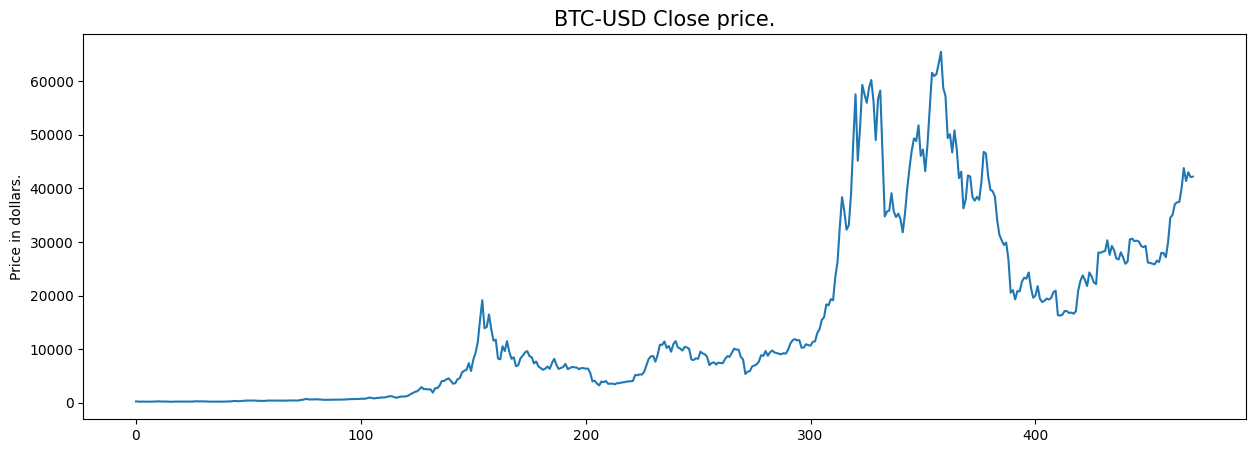

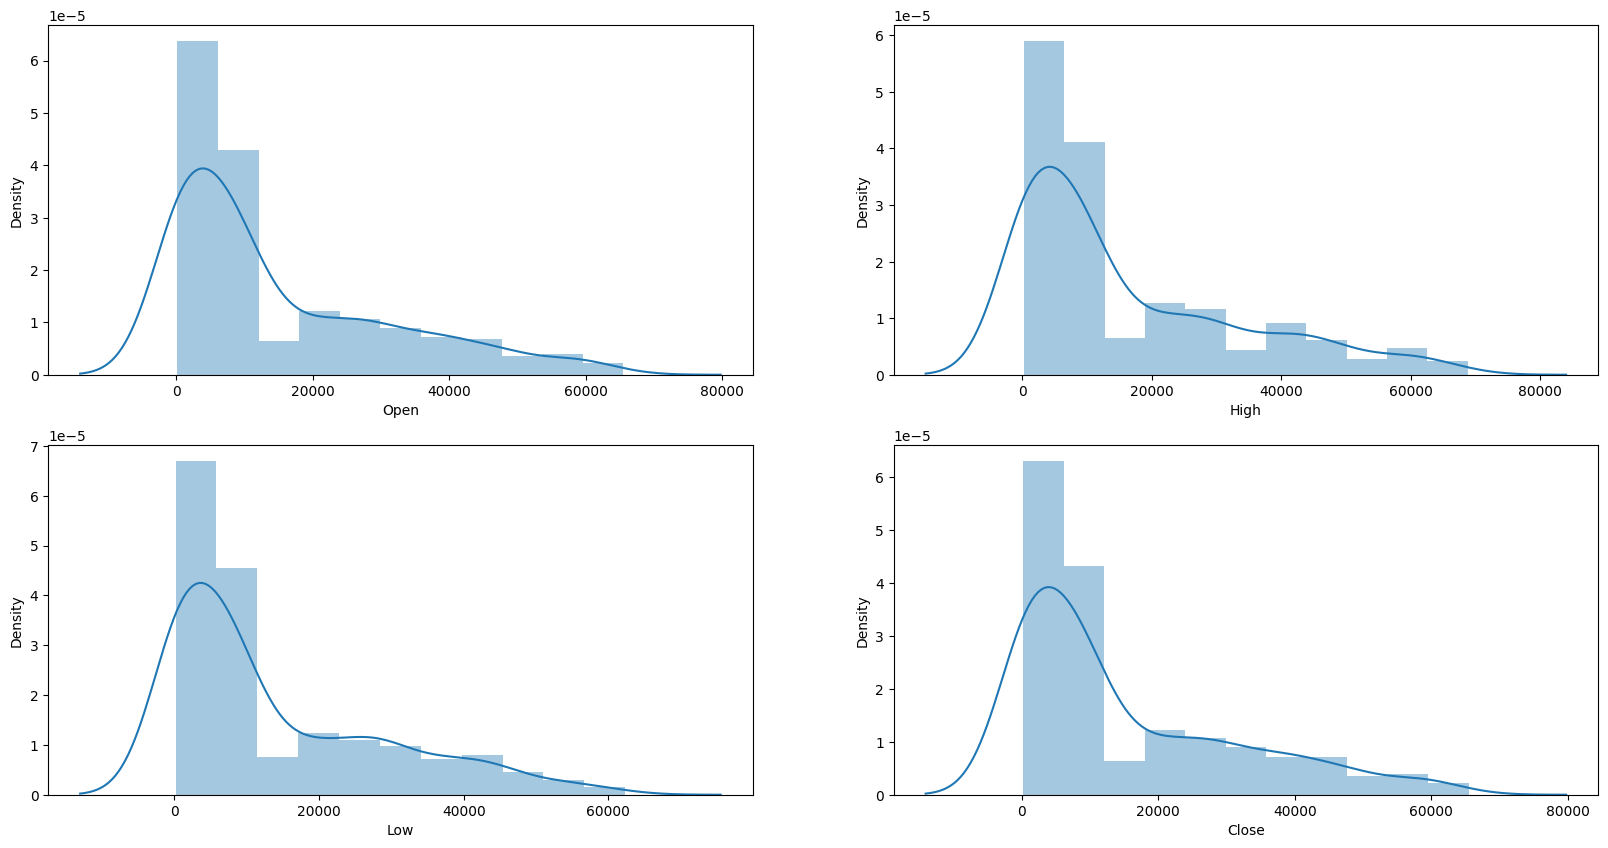

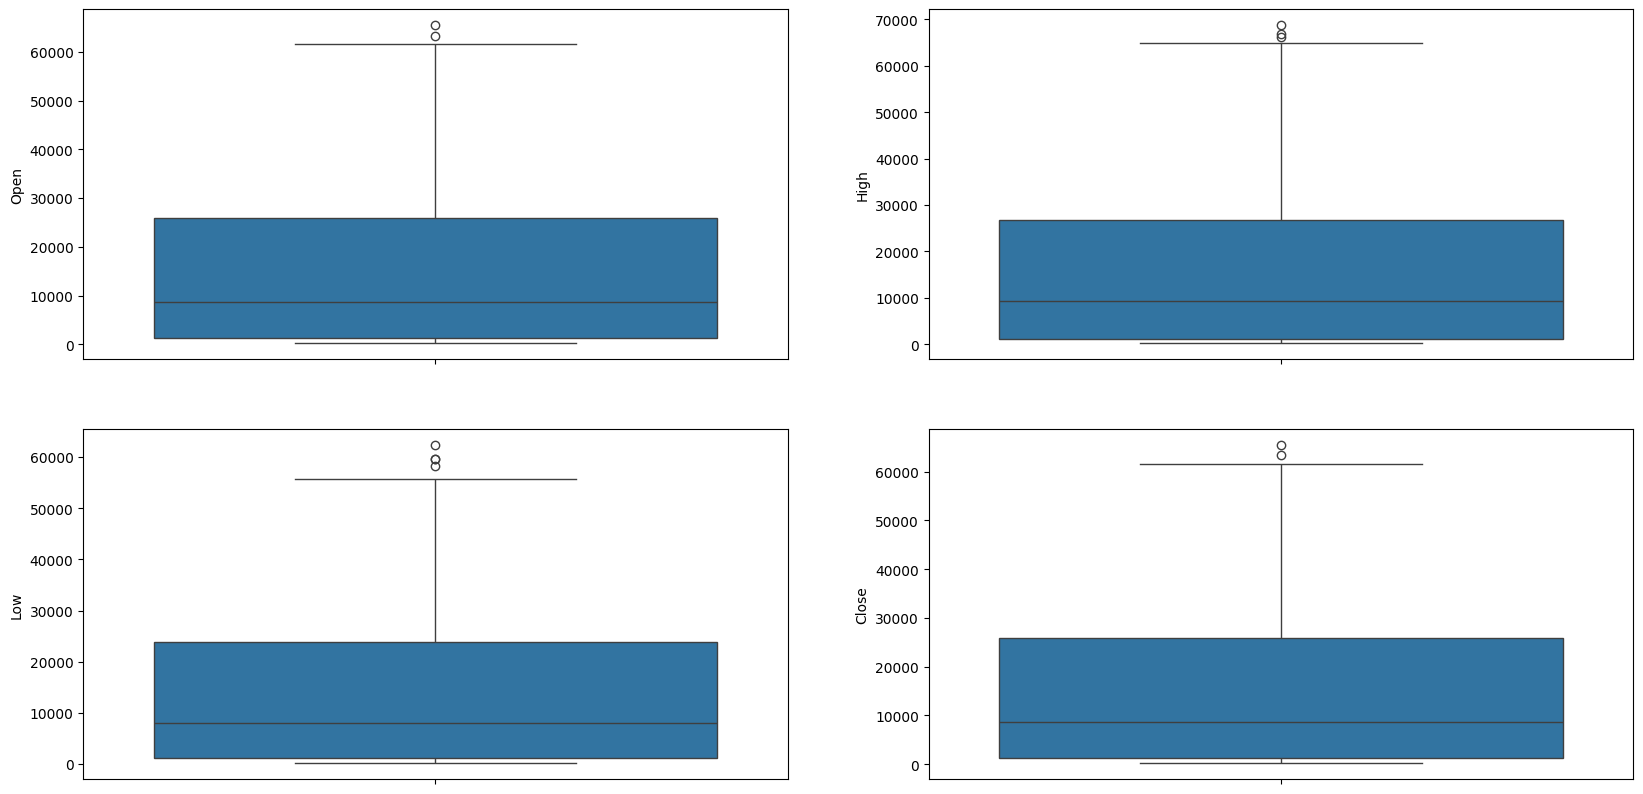

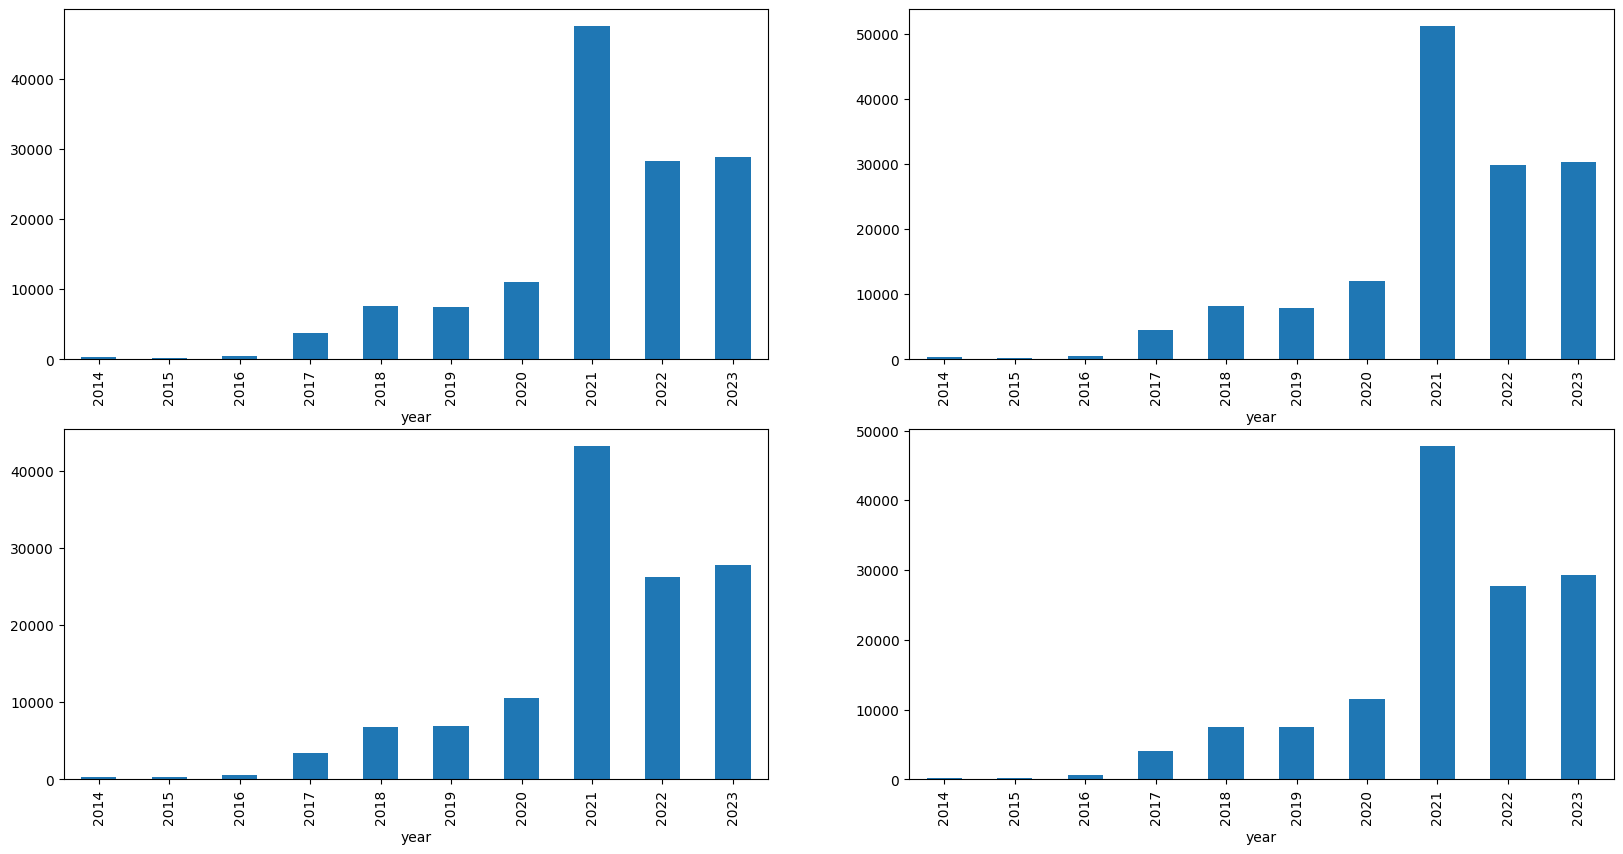

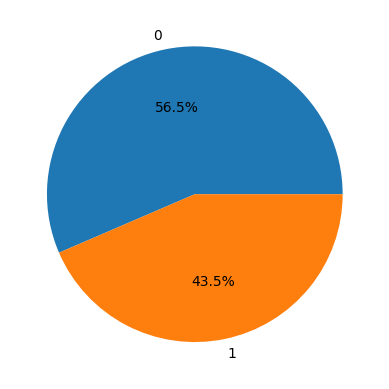

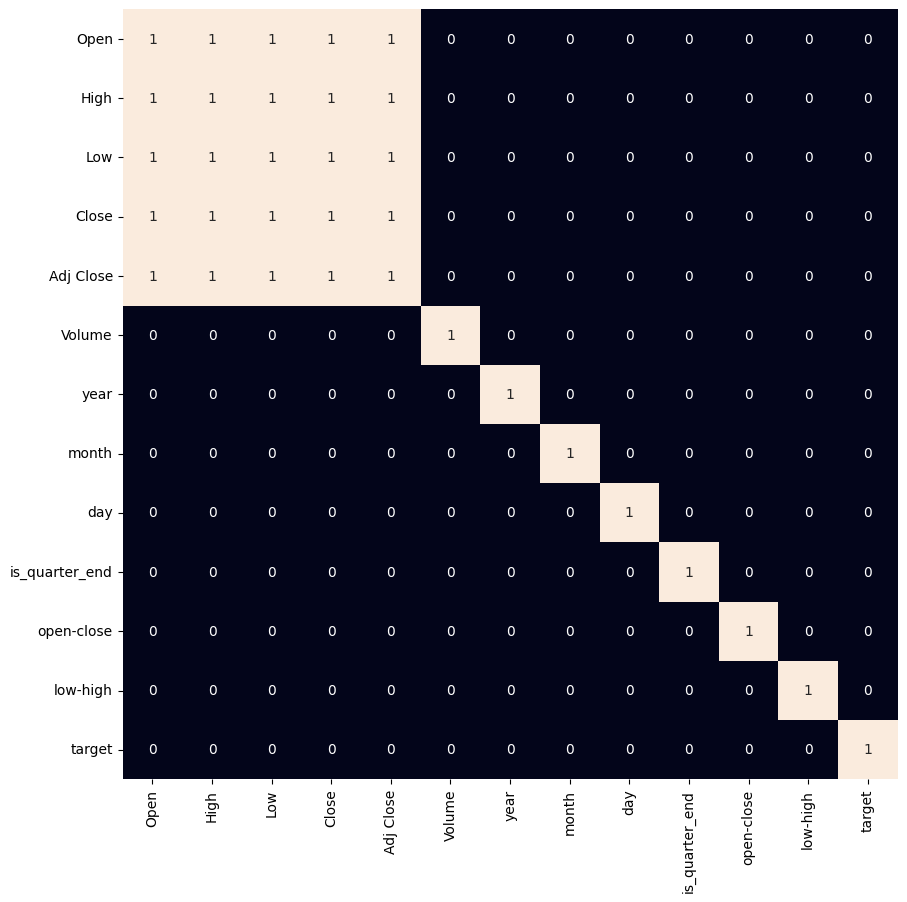

(423, 3) (48, 3)
LogisticRegression() : 
Training Accuracy :  0.5448557801498977
Validation Accuracy :  0.4017857142857143

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4802407449466273
Validation Accuracy :  0.5214285714285714

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, 

In [ ]:
# Adaboost
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

#Imported File
df =  pd.read_csv('/content/BTC-USD.csv')
df.head() #first five data

df.shape #shape of dataset in rows and columns

df.describe() #mathematic calculations like mean,count,etc

df.info() #provide datatyple and memory usage

#plotting graph of close price of bitcoin cash
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('BTC-USD Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

#From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data.
#So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.
df[df['Close'] == df['Adj Close']].shape, df.shape

#checks the null values
df.isnull().sum()

#ploting all graphs for all features
features = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sb.distplot(df[col])
plt.show()

#box plots
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
 plt.subplot(2,2,i+1)
 sb.boxplot(df[col])
plt.show()

#feature engineering this feature sometimes increases the perfomance of the model
splitted = df['Date'].str.split('-', expand=True)
df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')
df.head()

#bar graph
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
 plt.subplot(2,2,i+1)
 data_grouped[col].plot.bar()
plt.show()

#Quater end
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

#we have added some more columns which will help in the training of our model
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

#pie chart
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

#heatmap
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

#After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model.
#After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

#models
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for model in models:
    adaboost_model = AdaBoostClassifier(base_estimator=model, n_estimators=50, random_state=42)
    adaboost_model.fit(X_train, Y_train)

    print(f'{model} : ')
    print('Training Accuracy : ', roc_auc_score(Y_train, adaboost_model.predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', roc_auc_score(Y_valid, adaboost_model.predict_proba(X_valid)[:,1]))
    print()
#confusion matrix for validation data
#metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
#plt.show()













